In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier # Machine Learning Problems

df = pd.read_csv('Bank Dataset.csv')

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4982 non-null   int64  
 1   Age                 4982 non-null   int64  
 2   Experience          4982 non-null   int64  
 3   Income              4982 non-null   int64  
 4   ZIP_Code            4982 non-null   int64  
 5   Family_members      4982 non-null   int64  
 6   CCAvg               4982 non-null   float64
 7   Education           4982 non-null   int64  
 8   Mortgage            4982 non-null   int64  
 9   Personal_Loan       4982 non-null   int64  
 10  Securities_Account  4982 non-null   int64  
 11  CD_Account          4982 non-null   int64  
 12  Online              4982 non-null   int64  
 13  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 545.0 KB


In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.00000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,2502.352268,45.327178,20.096146,73.732637,93152.523485,2.39723,1.939962,1.880971,56.546367,0.095945,0.104175,0.060217,0.595945,0.294059
std,1441.813138,11.470821,11.475636,46.040144,2123.021796,1.14716,1.748566,0.839740,101.756369,0.294546,0.305518,0.237912,0.490757,0.455664
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.250000,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2502.500000,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3749.750000,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family_members        0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df = df.drop(['ID', 'ZIP_Code'], axis=1)

In [12]:
df.head()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['Personal_Loan']
x = df.drop(['Personal_Loan'], axis=1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=27)

In [16]:
# Scaling is required for Neural Network Model

from sklearn.preprocessing import StandardScaler

In [17]:
standardScaler = StandardScaler()

In [18]:
x_train = standardScaler.fit_transform(x_train)

In [19]:
x_train

array([[ 0.40696035,  0.51403175,  0.78483884, ..., -0.2525913 ,
         0.82345323, -0.64503559],
       [ 0.3198061 ,  0.33980278, -0.69082208, ..., -0.2525913 ,
         0.82345323, -0.64503559],
       [ 0.66842309,  0.2526883 , -0.34360774, ..., -0.2525913 ,
         0.82345323,  1.55030204],
       ...,
       [-0.37742787, -0.26999861, -0.0614961 , ..., -0.2525913 ,
         0.82345323,  1.55030204],
       [-0.29027362, -0.18288412, -1.12483999, ..., -0.2525913 ,
         0.82345323, -0.64503559],
       [ 1.71427404,  1.73363453,  0.95844601, ...,  3.9589646 ,
         0.82345323,  1.55030204]])

In [20]:
x_test = standardScaler.transform(x_test)
x_test

array([[-1.33612458e+00, -1.40248690e+00,  1.33811966e-01,
         1.39927207e+00, -8.09476714e-02,  1.40905988e-01,
        -5.55640282e-01, -3.40689619e-01, -2.52591296e-01,
        -1.21439805e+00, -6.45035594e-01],
       [ 1.45281130e+00,  1.47229108e+00, -1.38525074e+00,
         5.27346149e-01, -8.24019338e-01, -1.04982174e+00,
        -5.55640282e-01, -3.40689619e-01, -2.52591296e-01,
         8.23453234e-01, -6.45035594e-01],
       [-1.51043307e+00, -1.48960139e+00,  3.60659073e-03,
         5.27346149e-01,  3.76327200e-01,  1.33163372e+00,
        -5.55640282e-01, -3.40689619e-01, -2.52591296e-01,
        -1.21439805e+00, -6.45035594e-01],
       [ 9.29885826e-01,  1.03671866e+00, -2.13402368e-01,
         1.39927207e+00, -2.52425748e-01, -1.04982174e+00,
        -5.55640282e-01, -3.40689619e-01, -2.52591296e-01,
         8.23453234e-01, -6.45035594e-01],
       [-2.88108848e-02, -9.57696390e-02,  4.15923612e-01,
        -3.44579771e-01, -1.38107030e-01,  1.40905988e-01,
  

In [23]:
# Build MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), 
                    max_iter=500, 
                    solver='sgd', 
                    verbose=True, 
                    random_state=21,
                   tol=0.01) # 3 Layer of Neurons, max iterations threshold 500, threshold of 0.000000000001

In [24]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.63996502
Iteration 2, loss = 0.47082527
Iteration 3, loss = 0.38994583
Iteration 4, loss = 0.35363673
Iteration 5, loss = 0.33238001
Iteration 6, loss = 0.31619690
Iteration 7, loss = 0.30245854
Iteration 8, loss = 0.28999670
Iteration 9, loss = 0.27844543
Iteration 10, loss = 0.26773875
Iteration 11, loss = 0.25761555
Iteration 12, loss = 0.24817713
Iteration 13, loss = 0.23934927
Iteration 14, loss = 0.23105784
Iteration 15, loss = 0.22326306
Iteration 16, loss = 0.21609767
Iteration 17, loss = 0.20922486
Iteration 18, loss = 0.20293135
Iteration 19, loss = 0.19705102
Iteration 20, loss = 0.19150451
Iteration 21, loss = 0.18637782
Iteration 22, loss = 0.18151829
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [25]:
# Do a GridSearch Cross Validation



In [27]:
#  Evaluate model preformance

from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test, y_pred)

array([[29,  1],
       [ 0,  0]], dtype=int64)

In [31]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train, pred2)

array([[4456,   18],
       [ 331,  147]], dtype=int64)

In [33]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4474
           1       0.89      0.31      0.46       478

    accuracy                           0.93      4952
   macro avg       0.91      0.65      0.71      4952
weighted avg       0.93      0.93      0.91      4952



In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.00      0.00      0.00         0

    accuracy                           0.97        30
   macro avg       0.50      0.48      0.49        30
weighted avg       1.00      0.97      0.98        30



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9510154439504491


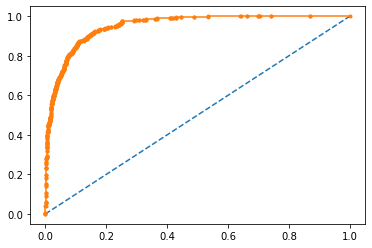

In [47]:
probs = clf.predict_proba(x_train)

probs = probs[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print(auc)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()


In [50]:
probs1 = clf.predict_proba(x_test)

probs1 = probs1[:, 1]

from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_test, probs1)
print(auc1)

fpr1, tpr1, thresholds1 = roc_curve(y_testt, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr1, tpr1, marker='.')

plt.show()


[[-1.33612458e+00 -1.40248690e+00  1.33811966e-01  1.39927207e+00
  -8.09476714e-02  1.40905988e-01 -5.55640282e-01 -3.40689619e-01
  -2.52591296e-01 -1.21439805e+00 -6.45035594e-01]
 [ 1.45281130e+00  1.47229108e+00 -1.38525074e+00  5.27346149e-01
  -8.24019338e-01 -1.04982174e+00 -5.55640282e-01 -3.40689619e-01
  -2.52591296e-01  8.23453234e-01 -6.45035594e-01]
 [-1.51043307e+00 -1.48960139e+00  3.60659073e-03  5.27346149e-01
   3.76327200e-01  1.33163372e+00 -5.55640282e-01 -3.40689619e-01
  -2.52591296e-01 -1.21439805e+00 -6.45035594e-01]
 [ 9.29885826e-01  1.03671866e+00 -2.13402368e-01  1.39927207e+00
  -2.52425748e-01 -1.04982174e+00 -5.55640282e-01 -3.40689619e-01
  -2.52591296e-01  8.23453234e-01 -6.45035594e-01]
 [-2.88108848e-02 -9.57696390e-02  4.15923612e-01 -3.44579771e-01
  -1.38107030e-01  1.40905988e-01 -5.55640282e-01 -3.40689619e-01
  -2.52591296e-01 -1.21439805e+00 -6.45035594e-01]
 [-1.68474157e+00 -1.75094484e+00 -1.29844716e+00  1.39927207e+00
  -8.81178697e-01 -

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.